0.04556509813523431 0.059009335487928034
The entire dataset has an average nearest neighbor distance of 0.000240361352928
The entire dataset is significant

Elements that occurred on 9/13/2014 have an average nn distance of 0.00256619518064
The date 9/13/2014 is significant

Elements involving animal bites have an average nn distance of 0.0126135423802
The animal bite issue is significant
OrderedDict([(0.0, 0.0), (0.0023827109035697569, 0.9960522320072882), (0.0047654218071395138, 0.9996963255390222)])


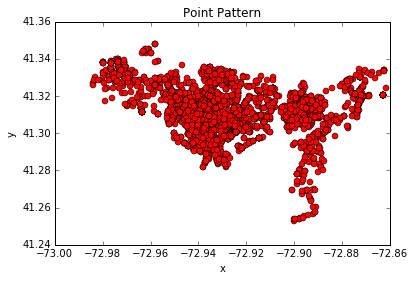

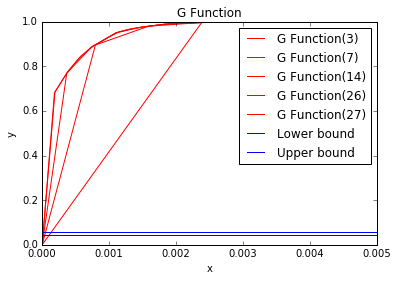

In [1]:
%matplotlib inline

from src.point_pattern import PointPattern
from src.point import Point
import pysal as ps
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

shapefile = ps.open(ps.examples.get_path('new_haven_merged.shp'))
dbf = ps.open(ps.examples.get_path('new_haven_merged.dbf'))

points= []
i = 0
for geometry, attributes in zip(shapefile, dbf):
    i += 1
    points.append(Point(
            geometry[0], 
            geometry[1], 
            date=attributes[0],
            problem=attributes[1],
            address=attributes[2],
            location=attributes[3],
            time=attributes[4]))
    '''
    # Uncommenting this section displays the first 50 items in the files.
    print(geometry, attributes)
    if i == 50:
        break
    '''
    
point_pattern = PointPattern()
for point in points:
    point_pattern.add_point(point)
    
c1, c2 = point_pattern.get_critical_points()
print(c1, c2)

def is_significant(n):
    if n < c1 or n > c2:
        return 'is significant'
    else:
        return 'is not significant'

nn = point_pattern.average_nearest_neighbor_distance_kdtree()
print("The entire dataset has an average nearest neighbor distance of", nn)
print("The entire dataset", is_significant(nn))

nn = point_pattern.average_nearest_neighbor_distance_kdtree(mark_name='date', mark_value=' Sat, Sept. 13th 2014')
print("\nElements that occurred on 9/13/2014 have an average nn distance of", nn)
print("The date 9/13/2014", is_significant(nn))

nn = point_pattern.average_nearest_neighbor_distance_kdtree(mark_name='problem', mark_value='animal-bites')
print("\nElements involving animal bites have an average nn distance of", nn)
print("The animal bite issue", is_significant(nn))


def generate_plot(x, y, title, **kwargs):
    fig, axes = plt.subplots()

    axes.plot(x, y, **kwargs)
    axes.set_xlabel('x')
    axes.set_ylabel('y')
    axes.set_title(title);

x = []
y = []
for point in point_pattern.points:
    x.append(point.x)
    y.append(point.y)

generate_plot(np.array(x), np.array(y), 'Point Pattern', color='red', marker='o', linewidth=0)

#x2 = np.array([3, 7, 14, 26, 27])
print(point_pattern.compute_g(3))
g3 = point_pattern.compute_g(3)
g7 = point_pattern.compute_g(7)
g14 = point_pattern.compute_g(14)
g26 = point_pattern.compute_g(26)
g27 = point_pattern.compute_g(27)
x2 = np.array(list(g3.keys()))
y2 = np.array(list(g3.values()))
x3 = np.array(list(g7.keys()))
y3 = np.array(list(g7.values()))
x4 = np.array(list(g14.keys()))
y4 = np.array(list(g14.values()))
x5 = np.array(list(g26.keys()))
y5 = np.array(list(g26.values()))
x6 = np.array(list(g27.keys()))
y6 = np.array(list(g27.values()))

'''
print(x2, y2)
print(x3, y3)
print(x4, y4)
print(x5, y5)
print(x6, y6)
'''

fig, ax = plt.subplots()
ax.plot(x2, y2, label="G Function(3)", color='red')
ax.plot(x3, y3, label="G Function(7)", color='red')
ax.plot(x4, y4, label="G Function(14)", color='red')
ax.plot(x5, y5, label="G Function(26)", color='red')
ax.plot(x6, y6, label="G Function(27)", color='red')

ax.plot((0, 0.005), (c1, c1), label="Lower bound", color='blue')
ax.plot((0, 0.005), (c2, c2), label="Upper bound", color='blue')
ax.legend(loc=0); # auto decide location
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('G Function');